# Eigenface

In [1]:
from os.path import isfile, join, exists
from os import listdir
import numpy as np
from skimage.util import img_as_float
from skimage import io
import matplotlib.pyplot as plt

mypathclass='Yalefaces'

In [2]:
onlyfilesclass = [f for f in listdir(mypathclass)  if isfile(join(mypathclass, f))]

Download the images

In [3]:
nfc=len(onlyfilesclass)
faces={}
for i in range(1,16):
    faces[i]=[]
for i in range(nfc):
    img=onlyfilesclass[i]
    imgSplit=img.split(".")
    subject=imgSplit[0]
    number = (subject[-2:])
    if len(number)==2:
      number = int((subject[-2:]))
      imgR = img_as_float(io.imread(join(mypathclass, img)))
      imgR =np.asarray(imgR)
      faces[number].append(imgR) 
  

Put  the images in a tensor, that is a matrix with three dimension. We divide the images in two set, the first one is called train set and is used to find the preliminary information, the second one is called test set and is used to test the algorithm

In [4]:
imgAT = []
imgTest =[]
for i in range(1,16):
    for j in range(7):
      imgAT.append(np.asarray(faces[i][j]))
    for j in range(7,11):
      imgTest.append(np.asarray(faces[i][j]))
    
imgAT = np.asarray(imgAT)
(nt,nr,nc)=imgAT.shape
print(nt,nr,nc)
imgTest = np.asarray(imgTest)
(nf,nr,nc)=imgTest.shape
print(nf,nr,nc)

105 243 320
60 243 320


In [5]:
# Compute a matrix containing all the train set images as his columns
imgA = imgAT.reshape(nt,nr*nc).T
imgTest = imgTest.reshape(nf,nr*nc).T

In [6]:
(nrc,nt)=imgA.shape

compute the mean image and subtract it to all the images

In [7]:
imgAsum = np.sum(imgA,axis=1)/nt
print(imgAsum.shape)
e = np.ones((1,nt))
imgAM=imgA-np.dot(imgAsum.reshape(nrc,1),e)
print(imgA.shape)

(77760,)
(77760, 105)


perform the PCA, for the moment we choose a fix number of components

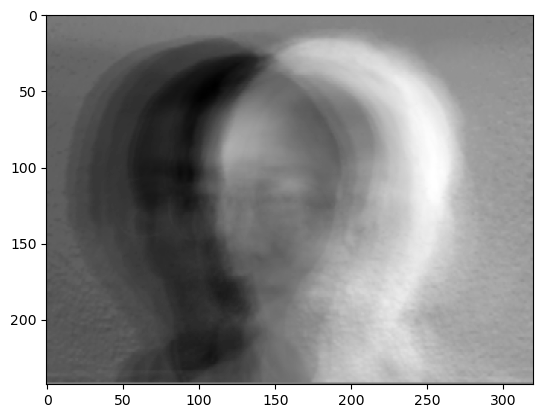

In [51]:
from sklearn.decomposition import PCA
whiten=True
ncomp=20
pca = PCA(copy=True,n_components=ncomp,whiten=True).fit(imgAM)
IM_pca = pca.transform(imgAM)
IM_pca = IM_pca/np.sqrt(nrc) #To make sure that the columns are orthogonal
plt.imshow(IM_pca[:,0].reshape(nr,nc),cmap='gray')

we choose a test image

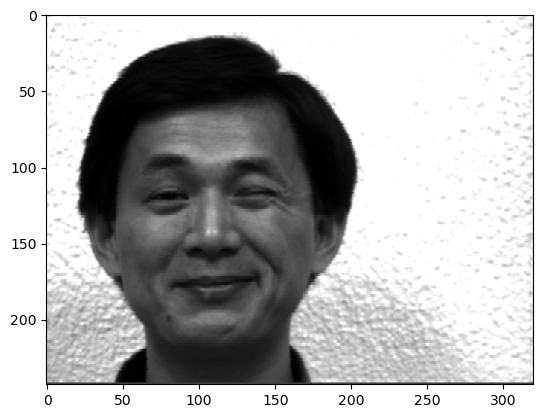

In [54]:
ng = 20
plt.imshow(imgTest[:,ng].reshape(nr,nc),cmap='gray')

In [55]:
# we compute the coordinates of the projection of the test image 
# onto the eigenface space
PT1=imgTest[:,ng]-imgAsum
mPT1=np.mean(PT1)
PT1=PT1-np.mean(PT1)
Ptest=np.dot( IM_pca.T,PT1)

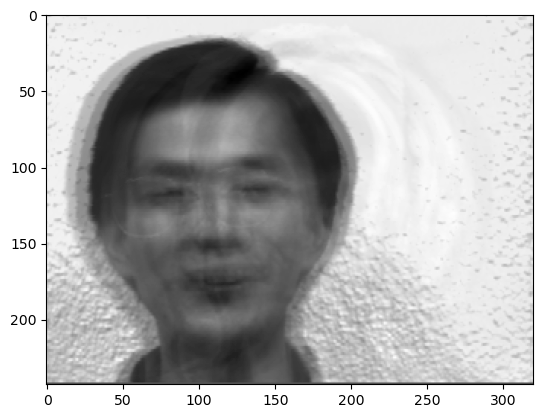

In [56]:
plt.imshow((np.dot(IM_pca,Ptest)+mPT1+imgAsum).reshape(nr,nc),cmap='gray')

In [57]:
# compute the class for each faces, that is the mean 
#  of the coordinates of the projection
Cli = {}
for i in range(1,16):
    Cli[i]=[]
for i in range(1,16):
     for j in range(7):
       PT1=faces[i][j].reshape(nr*nc)-imgAsum
       mPT1=np.mean(PT1)
       PT1=PT1-np.mean(PT1)
       Pimg=np.dot( IM_pca.T,PT1)
       Cli[i].append(Pimg)
     Cli[i]=np.asarray(Cli[i])
Cli[1].shape      

(7, 20)

In [58]:
om = {}
for i in range(1,16):
    om[i]=np.mean(Cli[i],axis=0)    

The simplest method for determine which face class provide the best description of the input is to find the face class that minimize the euclidean differences of the coordinates in the eigenface basis. We compute the norm for each class

In [59]:
v = np.zeros((15,1))
for i in range(1,16):
    v[i-1]= np.linalg.norm(om[i]-Ptest)

In [60]:
nclass=np.argmin(v)
print(nclass)

5


let us check the result

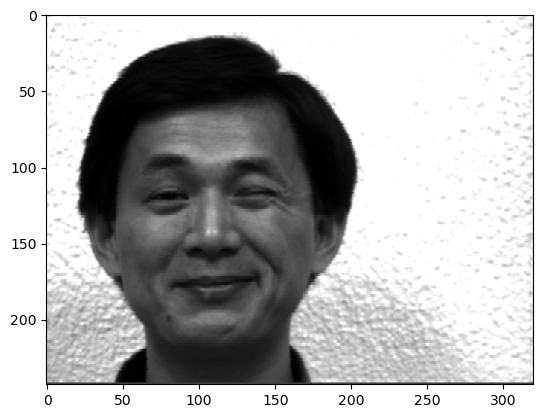

In [61]:
plt.imshow(imgTest[:,ng].reshape(nr,nc),cmap='gray')

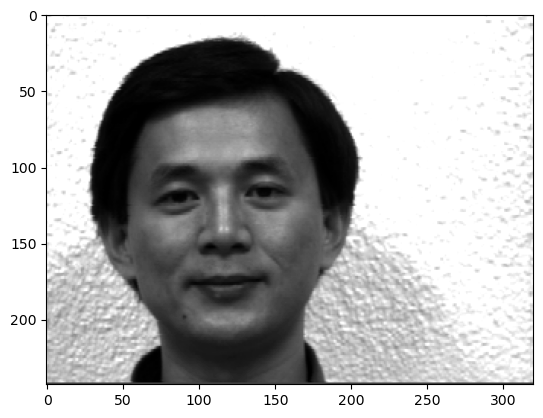

In [62]:
plt.imshow(np.asarray(faces[nclass+1][0]).reshape(nr,nc),cmap='gray')

Exercise 1: check and compare all the studied techniques to find the minimal value of k, number of principal component that are useful to classify the faces

Exercise 2: Classify all the faces in the testset and compute the confusion matrix. The element in position i,j of the confusion matrix  contains the number of observations known to be in group i and predicted to be in group j. Use  sklearn.metrics.confusion_matrix, and compute also the classification report using sklearn.metrics.classification_report